In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글 폰트 사용
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()  #FontProperties폰트지정함수 위치,이름(맑은고딕)
plt.rc("font", family=font_name)  #맷플로립한테 폰트이거 쓰라고 알려주는

#한글 썼을 때 마이너스 깨지는거 해결해주는
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\pwngu\AppData\Local\Temp\ipykernel_29440\2411844505.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [3]:
chicken = pd.read_csv("data/치킨_R03.csv")

In [5]:
chicken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Contents      2000 non-null   object 
 3   Tags          2000 non-null   object 
 4   Tags_sum      2000 non-null   int64  
 5   Tags_count    2000 non-null   int64  
 6   Tags_rate     2000 non-null   float64
 7   Likes         2000 non-null   int64  
 8   Scaled_likes  2000 non-null   float64
 9   Post_num      2000 non-null   float64
 10  Followers     2000 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 172.0+ KB


In [6]:
chicken.head(10)

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Post_num,Followers
0,치킨,z.e.o.m,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,12,109.09,1040,0.175646,236.0,8603.0
1,치킨,foodgangster_fgg,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,8,88.89,109,0.018409,128.0,3360.0
2,치킨,bboong_bbang_2,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0,0.00,109,0.018409,741.0,6928.0
3,치킨,dhrkspths,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0,0.00,9,0.001520,2178.0,27000.0
4,치킨,a_a_bl0s2om,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,6,21.43,19,0.003209,606.0,1020.0
5,치킨,yeony_matzipsa,협찬 소떡소떡 밀어내고 이제는 치떡 시대야식 하면 가장 먼저 생각나는 치킨과...,"#치킨맛집, #떡볶이맛집, #치킨추천, #떡볶이추천, #배달맛집",5,6,120.00,742,0.125317,223.0,8787.0
6,치킨,cookat.magazine,네네치킨 신상 국물게티X레드마블 네네치킨에서 신메뉴를 선보입니다 넉넉한 국물에 떡...,"#네네치킨, #네네치킨신상, #신상마켓, #쿠캣신상마켓, #국물게티, #로제게티, ...",25,5,20.00,888,0.149975,5861.0,1311000.0
7,치킨,wooo_new,맵찔이도 폭풍흡입하는 고추바사삭 볼케이노 오늘은 굽네치킨입니다 배달...,"#굽네치킨제, #우뉴_배달, #배달음식, #배달맛집, #고추바사삭, #볼케이노, #...",7,3,42.86,797,0.134606,395.0,19000.0
8,치킨,matport_,참숯치킨은 절대 못참지 치즈소스도 못참지 훌랄라치킨 훌랄라참숯바베큐치킨...,"#훌랄라치킨, #훌랄라참숯바베큐치킨, #훌랄라치킨, #안산맛집, #인천맛집, #치킨...",19,18,94.74,757,0.127850,379.0,44000.0
9,치킨,sun_star520,하하호호오늘 넘 많이 웃었다 대화가 되는 나이가 됐군 좀 ...,"#하하호호오늘, #햄버거셔틀, #상전아들, #싄나싄나🎶, #춤추고난리, #야식, #...",14,1,7.14,1,0.000169,538.0,251.0


In [10]:
r02 = pd.read_csv("data/result2.csv", error_bad_lines=False)

C:\Users\pwngu\AppData\Local\Temp\ipykernel_28140\2623633116.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  r02 = pd.read_csv("data/result2.csv", error_bad_lines=False)
b'Skipping line 5134: expected 10 fields, saw 15\nSkipping line 5935: expected 10 fields, saw 38\nSkipping line 6579: expected 10 fields, saw 27\nSkipping line 6721: expected 10 fields, saw 38\nSkipping line 7652: expected 10 fields, saw 14\nSkipping line 12836: expected 10 fields, saw 26\n'


In [12]:
r02.head(20)

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,돈까스,bbo_muksta,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,2.0,33.33,3126.0,0.396449,377.0
1,돈까스,___foodtour,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,0.0,0.00,3750.0,0.475587,467.0
2,돈까스,mukpresident,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,2.0,25.00,2761.0,0.350159,634.0
3,돈까스,fooseidon_,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#ㅂㅜㄱㅊㅓㄴ, #ㅂㅜㄱㅊㅓㄴㄷㅗㄴㄲㅏㅅㅡ??11:00~19:30, #푸세이돈_ㅇㅛ...",18,0.0,0.00,7885.0,1.000000,469.0
4,돈까스,cayeongmi9,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,3.0,15.79,317.0,0.040203,393.0
5,돈까스,miro__food,협찬 안양 범계 유미카츠 떡볶카츠 돈까스맛집 돈까스와 떡볶이 러버들이...,"#안양, #범계, #유미카츠, #떡볶카츠, #돈까스맛집, #미로_범계, #미로_안양...",19,3.0,15.79,655.0,0.083069,1510.0
6,돈까스,_mukjini,첫줄원래 5시에 퇴근을 하는데오늘은 한시간 늦은 6시에 퇴근을 하게되어 형님들과 ...,#첫줄원래,1,0.0,0.00,109.0,0.013824,183.0
7,돈까스,food__some,오래된 세월이 가게의 맛을 보장해 주는 곳 무려 39년 동안 한자리를 지키고 있는...,"#돈까스의집첫, #푸썸_송파",2,0.0,0.00,1205.0,0.152822,358.0
8,돈까스,heokw,이제는 최고라 하긴 힘들지만 나한텐 추억의 맛이다 근데 상호가 명동돈가스라는 걸 ...,"#명동돈가스, #명동돈까스, #돈까스, #돈카츠, #로스카츠, #돈까스맛집, #돈카...",11,3.0,27.27,52.0,0.006595,142.0
9,돈까스,openbopk,오늘 저녁은 뭐 먹지 초밥 초밥맛집 초밥스타그램 돈까스 돈까스맛집 먹스타그...,"#초밥, #초밥맛집, #초밥스타그램, #돈까스, #돈까스맛집, #먹스타그램맞팔, #일상",7,3.0,42.86,0.0,0.000000,53.0


In [13]:
r02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13321 non-null  object 
 1   ID            13321 non-null  object 
 2   Contents      13321 non-null  object 
 3   Tags          12035 non-null  object 
 4   Tags_sum      13321 non-null  int64  
 5   Tags_count    13321 non-null  float64
 6   Tags_rate     13321 non-null  float64
 7   Likes         13321 non-null  float64
 8   Scaled_likes  13321 non-null  float64
 9   Contents_len  13318 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.0+ MB


In [17]:
r02["Contents_len"].fillna("", inplace= True)
r02["Tags"].fillna("", inplace= True)

In [18]:
r02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13321 non-null  object 
 1   ID            13321 non-null  object 
 2   Contents      13321 non-null  object 
 3   Tags          13321 non-null  object 
 4   Tags_sum      13321 non-null  int64  
 5   Tags_count    13321 non-null  float64
 6   Tags_rate     13321 non-null  float64
 7   Likes         13321 non-null  float64
 8   Scaled_likes  13321 non-null  float64
 9   Contents_len  13321 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.0+ MB


In [63]:
rpk = r02[r02['Category'] == '돈까스']
rc = r02[r02['Category'] == '치킨']


In [64]:
# 태그 처리 : , 분리
Tag = []
for i in rc["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#동근이숯불두마리치킨',
 '#동근이숯불두마리치킨',
 '#치킨',
 '#치킨맛집',
 '#배달치킨',
 '#배달맛집',
 '#숯불바베큐',
 '#치킨추천',
 '#복대동맛집',
 '#청주맛집',
 '#청주배달맛',
 '#치킨매니아',
 '#푸드갱_배달',
 '#배달맛집',
 '#치킨맛집',
 '#떡볶이맛집',
 '#배달음식추천',
 '#야식추천',
 '#치맥',
 '#치킨추',
 '',
 '',
 '#대구맛집',
 '#먹방',
 '#instafood',
 '#요리스타그램',
 '#요리',
 '#맛스타그램',
 '#먹스타그램',
 '#선팔',
 '#맞팔',
 '#선팔하면맞팔',
 '#선팔해요',
 '#followforfollow',
 '#맞팔해요',
 '#팔로우',
 '#팔로잉',
 '#팔로미',
 '#팔로워',
 '#데일리',
 '#팔로우미',
 '#소통',
 '#소통해요',
 '#셀피',
 '#카페스타그램',
 '#댓글',
 '#follow4like',
 '#좋아요반사',
 '#좋아요',
 '#like4lik',
 '#치킨맛집',
 '#떡볶이맛집',
 '#치킨추천',
 '#떡볶이추천',
 '#배달맛',
 '#네네치킨',
 '#네네치킨신상',
 '#신상마켓',
 '#쿠캣신상마켓',
 '#국물게티',
 '#로제게티',
 '#매콤게티',
 '#레드마블치킨',
 '#레드마블',
 '#치킨',
 '#치킨추천',
 '#스파게티',
 '#파스타',
 '#홈술',
 '#분식',
 '#야식',
 '#저메추',
 '#쿠캣',
 '#쿠캣마켓',
 '#신상리뷰',
 '#쿠캣매거진',
 '#쿠캣디',
 '#pasta',
 '#spaghetti',
 '#chicke',
 '#굽네치킨제',
 '#우뉴_배달',
 '#배달음식',
 '#배달맛집',
 '#고추바사삭',
 '#볼케이노',
 '#굽네치킨메',
 '#훌랄라치킨',
 '#훌랄라참숯바베큐치킨',
 '#훌랄라치킨',
 '#안산맛집',
 '#인천맛집',
 '#치킨맛집',
 '#숯불치킨',
 '#숯불바베큐',
 '#서산맛집',
 '

In [65]:
tag_count = Counter(Tag)
tag_count

rank_text = tag_count.most_common()
rank_text

[('#치킨', 1521),
 ('#먹스타그램', 360),
 ('#맛스타그램', 292),
 ('#맛집', 292),
 ('#치킨맛집', 263),
 ('#일상', 224),
 ('', 220),
 ('#먹방', 214),
 ('#좋아요', 205),
 ('#치맥', 187),
 ('#맞팔', 170),
 ('#먹스타', 160),
 ('#술스타그램', 138),
 ('#치', 137),
 ('#치킨추천', 129),
 ('#맥주', 126),
 ('#소통', 124),
 ('#먹팔', 119),
 ('#야식', 116),
 ('#치킨스타그램', 106),
 ('#food', 104),
 ('#데일리', 93),
 ('#일상스타그램', 93),
 ('#chicken', 92),
 ('#주말', 92),
 ('#좋아요반사', 90),
 ('#불금', 90),
 ('#daily', 83),
 ('#데이트', 81),
 ('#누구나홀딱반한닭', 81),
 ('#치킨먹방', 81),
 ('#신년회모임', 77),
 ('#쌈닭', 77),
 ('#광', 77),
 ('#술', 76),
 ('#팔로우', 74),
 ('#부산', 73),
 ('#피자', 72),
 ('#소주', 72),
 ('#선팔', 71),
 ('#먹스타맞팔', 70),
 ('#좋반', 69),
 ('#집밥', 68),
 ('#통닭', 67),
 ('#음식', 66),
 ('#맛집추천', 65),
 ('#치느님', 65),
 ('#저녁', 64),
 ('#선팔하면맞팔', 63),
 ('#삼겹살', 63),
 ('#떡볶이', 62),
 ('#후라이드', 62),
 ('#치킨먹는날', 62),
 ('#치킨맥주', 60),
 ('#맛있다', 59),
 ('#??', 59),
 ('#배달맛집', 57),
 ('#치킨그램', 56),
 ('#f4f', 55),
 ('#럽스타그램', 55),
 ('#양념치킨', 54),
 ('#먹방스타그램', 54),
 ('#jmt', 53),
 ('#교촌치킨', 52),
 

In [95]:
stop_words = ["#치킨", "#치", "#??","#chicken", "#먹스타그램", "#맛스타그램", "#맛집", "#치킨맛집", "#일상", "#먹스타", "#먹방", "#치킨추천", "#맞팔", "#좋아요"]

token_tk = Tag
len(Tag)
token_tk = [each_word1 for each_word1 in token_tk if each_word1 not in stop_words]
print(len(token_tk))

data2 = nltk.Text(token_tk, name="치킨").vocab().most_common()

24403


In [91]:
data2

[('', 220),
 ('#먹방', 214),
 ('#좋아요', 205),
 ('#치맥', 187),
 ('#맞팔', 170),
 ('#술스타그램', 138),
 ('#치킨추천', 129),
 ('#맥주', 126),
 ('#소통', 124),
 ('#먹팔', 119),
 ('#야식', 116),
 ('#치킨스타그램', 106),
 ('#food', 104),
 ('#데일리', 93),
 ('#일상스타그램', 93),
 ('#주말', 92),
 ('#좋아요반사', 90),
 ('#불금', 90),
 ('#daily', 83),
 ('#데이트', 81),
 ('#누구나홀딱반한닭', 81),
 ('#치킨먹방', 81),
 ('#신년회모임', 77),
 ('#쌈닭', 77),
 ('#광', 77),
 ('#술', 76),
 ('#팔로우', 74),
 ('#부산', 73),
 ('#피자', 72),
 ('#소주', 72),
 ('#선팔', 71),
 ('#먹스타맞팔', 70),
 ('#좋반', 69),
 ('#집밥', 68),
 ('#통닭', 67),
 ('#음식', 66),
 ('#맛집추천', 65),
 ('#치느님', 65),
 ('#저녁', 64),
 ('#선팔하면맞팔', 63),
 ('#삼겹살', 63),
 ('#떡볶이', 62),
 ('#후라이드', 62),
 ('#치킨먹는날', 62),
 ('#치킨맥주', 60),
 ('#맛있다', 59),
 ('#배달맛집', 57),
 ('#치킨그램', 56),
 ('#f4f', 55),
 ('#럽스타그램', 55),
 ('#양념치킨', 54),
 ('#먹방스타그램', 54),
 ('#jmt', 53),
 ('#교촌치킨', 52),
 ('#야식치킨', 52),
 ('#맥주전문점', 52),
 ('#치킨한마리', 52),
 ('#맛집스타그램', 51),
 ('#서울', 51),
 ('#후라이드치킨', 49),
 ('#이벤트', 47),
 ('#소맥', 46),
 ('#koreanfood', 45),
 ('#foodstag

(-0.5, 399.5, 199.5, -0.5)

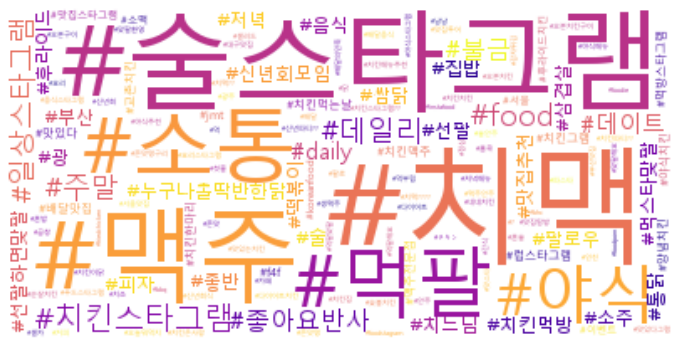

In [96]:
#pork_mask = np.array(Image.open("data/pork2.jpg"))

wc = WordCloud(max_font_size=80, background_color="white",
              max_words=700, colormap = 'plasma',
                font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(data2))


plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [101]:
r02

,Category,ID,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,돈까스,bbo_muksta,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,2.0,33.33,3126.0,0.396449,377.0
1,돈까스,___foodtour,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,0.0,0.00,3750.0,0.475587,467.0
2,돈까스,mukpresident,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,2.0,25.00,2761.0,0.350159,634.0
3,돈까스,fooseidon_,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#ㅂㅜㄱㅊㅓㄴ, #ㅂㅜㄱㅊㅓㄴㄷㅗㄴㄲㅏㅅㅡ??11:00~19:30, #푸세이돈_ㅇㅛ...",18,0.0,0.00,7885.0,1.000000,469.0
4,돈까스,cayeongmi9,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,3.0,15.79,317.0,0.040203,393.0
...,...,...,...,...,...,...,...,...,...,...
13316,햄버거,na.swrs.on,행운버거 행운이 있음 좋겠네 맥도날드 햄버거 행운버거 좋반 먹팔 푸드스타그램 ...,"#맥도날드, #햄버거, #행운버거, #좋반, #먹팔, #푸드스타그램, #일상그램, ...",30,3.0,10.00,95.0,0.012349,209.0
13317,햄버거,what.theburger_ph,What_the_burger_ph 치킨신메뉴판매중 버거랑 치킨이랑 같이 먹으면...,"#포항핫플레이스, #포항죽도동맛집, #포항맛집추천, #포항왓더버거, #포항수제버거,...",14,1.0,7.14,16.0,0.002080,255.0
13318,햄버거,to840815,몬스터신부101번째프로포즈 영화오랜만에 극장나들이 즐겁고 배부른 하루 상봉...,"#몬스터신부101번째프로포즈, #영화오랜만에, #상봉, #cgv, #팝콘, #햄버거...",7,1.0,14.29,5.0,0.000650,63.0
13319,햄버거,suny6250,방학을 한 첫찌ㅠ ㅠ 전쟁이 따로없군학교갈때도전쟁이라 생각했는데 방학이 더 전...,"#첫찌방학, #둘찌와함께, #육아는, #헬이네요, #음.., #애셋을, #오늘점심은...",14,1.0,7.14,13.0,0.001690,271.0


In [102]:
Tag1 = []
for i in r02["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag1.append(j)
Tag1

['#돈까스의집',
 '#돈까스맛집',
 '#송파맛집',
 '#삼전역맛집',
 '#빵맛집',
 '#돈까',
 '#건대',
 '#성수완당깔끔한',
 '#투어_건',
 '#사장님돈까스',
 '#먹통령_이대',
 '#이대맛집',
 '#이화여대맛집',
 '#고치돈맛집',
 '#돈까스맛집',
 '#치즈돈까스',
 '#고구마돈까',
 '#ㅂㅜㄱㅊㅓㄴ',
 '#ㅂㅜㄱㅊㅓㄴㄷㅗㄴㄲㅏㅅㅡ??11:00~19:30',
 '#푸세이돈_ㅇㅛㅇㅅㅏㄴ',
 '#ㅇㅛㅇㅅㅏㄴㅁㅏㅅㅈㅣㅂ',
 '#ㅇㅛㅇㅅㅏㄴㅇㅕㄱㅁㅏㅅㅈㅣㅂ',
 '#ㅅㅣㄴㅇㅛㅇㅅㅏㄴㅁㅏㅅㅈㅣㅂ',
 '#ㅅㅏㅁㄱㅏㄱㅈㅣㅁㅏㅅㅈㅣㅂ',
 '#ㅅㅏㅁㄱㅏㄱㅈㅣㅇㅕㄱㅁㅏㅅㅈㅣㅂ',
 '#ㅅㅣㄴㅇㅛㅇㅅㅏㄴㅇㅕㄱㅁㅏㅅㅈㅣㅂ',
 '#ㅇㅣㅊㅗㄴㅇㅕㄱㅁㅏㅅㅈㅣㅂ',
 '#ㅇㅣㅊㅗㄴㅁㅏㅅㅈㅣㅂ',
 '#ㄷㅗㄴㄲㅏㅅㅡ',
 '#ㄷㅗㄴㄲㅏㅅㅡㅁㅏㅅㅈㅣㅂ',
 '#ㄷㅗㄴㄲㅏㅅㅡㅁㅏㅅㅈㅣㅂㅊㅜㅊㅓㄴ',
 '#ㅅㅓㅇㅜㄹㄷㅗㄴㄲㅏㅅㅡ',
 '#ㄱㅕㅇㅇㅑㅇㅅㅣㄱㄷㅗㄴㄲㅏㅅㅡ',
 '#foodpics',
 '#foodpor',
 '#치즈돈까스',
 '#집에서만들기',
 '#키마카레',
 '#미니돈까스',
 '#사평카레',
 '#저수분카레',
 '#코스트코모짜렐라치즈',
 '#수제돈까스',
 '#집밥스타그램',
 '#집밥',
 '#홈쿡스타그램',
 '#요리그램',
 '#요리하는여자',
 '#먹스타그램??',
 '#맛스타',
 '#먹팔',
 '#foods',
 '#koreanfood',
 '#돈까',
 '#안양',
 '#범계',
 '#유미카츠',
 '#떡볶카츠',
 '#돈까스맛집',
 '#미로_범계',
 '#미로_안양',
 '#돈카츠맛집',
 '#돈카츠',
 '#돈까스',
 '#떡볶이맛집',
 '#떡볶이돈까스',
 '#범계맛집',
 '#범계역맛집',
 '#범계로데오',
 '#범계맛집추천',
 '#안양맛집',
 '#안산맛집',
 '#범계',
 '#첫줄원',
 '#돈까스의집첫',
 '#푸썸_송',
 '#명동돈가스',
 '#명동돈까스',
 '#돈까스',
 '#돈카

In [103]:
tag_count1 = Counter(Tag1)
tag_count1

rank_text1 = tag_count1.most_common()
rank_text1

[('#피자', 2049),
 ('#치킨', 1682),
 ('#떡볶이', 1603),
 ('#먹스타그램', 1588),
 ('#스시', 1539),
 ('', 1508),
 ('#돈까스', 1458),
 ('#햄버거', 1261),
 ('#맛집', 1259),
 ('#파스타', 1241),
 ('#일상', 1205),
 ('#맛스타그램', 1131),
 ('#초밥', 857),
 ('#소통', 681),
 ('#먹방', 676),
 ('#맞팔', 662),
 ('#좋아요', 614),
 ('#먹스타', 526),
 ('#먹팔', 493),
 ('#혜화역맛집', 483),
 ('#좋아요반사', 460),
 ('#집밥', 459),
 ('#일상스타그램', 457),
 ('#food', 457),
 ('#데일리', 428),
 ('#좋반', 406),
 ('#서울맛집', 370),
 ('#초밥맛집', 359),
 ('#맛집추천', 353),
 ('#수제버거', 339),
 ('#점심', 333),
 ('#음식', 331),
 ('#맛집스타그램', 323),
 ('#foodstagram', 321),
 ('#??', 321),
 ('#스테이크', 320),
 ('#선팔하면맞팔', 303),
 ('#instafood', 297),
 ('#선팔', 295),
 ('#샐러드', 293),
 ('#파스타맛집', 292),
 ('#일상그램', 291),
 ('#일식', 285),
 ('#오늘뭐먹지', 285),
 ('#치킨맛집', 284),
 ('#야식', 281),
 ('#사시미', 277),
 ('#댓글소통', 277),
 ('#daily', 266),
 ('#맞팔은댓', 253),
 ('#일상생활', 253),
 ('#돈까스맛집', 250),
 ('#술스타그램', 247),
 ('#대학로맛집', 247),
 ('#오마카세', 246),
 ('#먹스타맞팔', 244),
 ('#저녁', 244),
 ('#?', 241),
 ('#sushi', 241),
 ('#대학로카페'

In [110]:
stop_words1 = ["#치킨", "#떡볶이", "#스시","#파스타", "#피자", "#햄버거", "#돈까스", "#chicken", "#sushi", "#pasta", "#pizza", "#hamburger", 
               "#burger", "#tteokbokki"]

token_tk1 = Tag1
len(Tag1)
token_tk1 = [each_word1 for each_word1 in token_tk1 if each_word1 in stop_words1]
print(len(token_tk1))

data1 = nltk.Text(token_tk1, name="전체").vocab().most_common()

11779


In [111]:
data1

[('#피자', 2049),
 ('#치킨', 1682),
 ('#떡볶이', 1603),
 ('#스시', 1539),
 ('#돈까스', 1458),
 ('#햄버거', 1261),
 ('#파스타', 1241),
 ('#sushi', 241),
 ('#pasta', 165),
 ('#pizza', 144),
 ('#hamburger', 123),
 ('#burger', 110),
 ('#chicken', 106),
 ('#tteokbokki', 57)]

In [113]:
pd.DataFrame(data1)

,0,1
0,#피자,2049
1,#치킨,1682
2,#떡볶이,1603
3,#스시,1539
4,#돈까스,1458
5,#햄버거,1261
6,#파스타,1241
7,#sushi,241
8,#pasta,165
9,#pizza,144


(-0.5, 399.5, 199.5, -0.5)

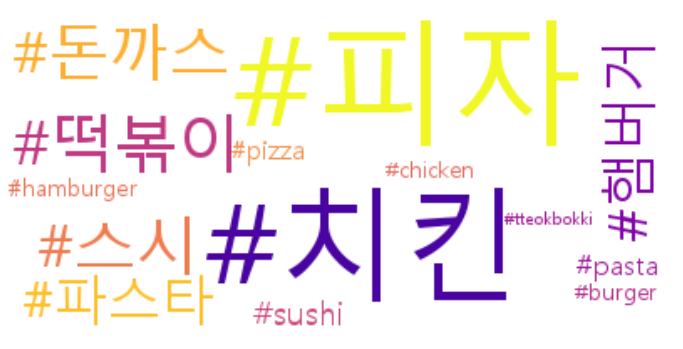

In [112]:
wc1 = WordCloud(max_font_size=80, background_color="white",
              max_words=700, colormap = 'plasma',
                font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(data1))


plt.figure(figsize=(12,12))
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")

### 추천

In [4]:
pd.read_csv("suggestion.csv")

,Category,Contents,Tags
0,돈까스,"['돈까스', '맛집', '먹스타그램', '돈까스맛집', '맛스타그램']","['#돈까스', '#먹스타그램', '#돈까스맛집', '#맛집', '#맛스타그램']"
1,떡볶이,"['떡볶이', '먹스타그램', '순대', '분식', '엽떡']","['#떡볶이', '#먹스타그램', '#떡볶이맛집', '#분식', '#koreanfo..."
2,스시,"['스시', '초밥', '혜화역맛집', '초밥맛집', '오마카세']","['#스시', '#초밥', '#혜화역맛집', '#초밥맛집', '#사시미']"
3,치킨,"['치킨', '먹스타그램', '야식', '먹방', '치맥']","['#치킨', '#먹스타그램', '#맛집', '#불금', '#치킨추천']"
4,파스타,"['파스타', '생면파스타', '맛집', '와인', '스테이크']","['#파스타', '#연남동파스타', '#스테이크', '#먹스타그램', '#피자']"
5,피자,"['피자', '일상', '소통', '맛집', '스파게티']","['#피자', '#일상', '#소통', '#댓글소통', '#일상생활']"
6,햄버거,"['햄버거', '수제버거', '버거', '수제버거맛집', '맛스타그램']","['#햄버거', '#수제버거', '#먹스타그램', '#수제버거맛집', '#버거맛집']"
